# Importing libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Loading the dataset:

In [2]:
df=pd.read_csv(r"F:\DHIVYA\DATA SCIENCE\MACHINE LEARNING\ML projects\DATASETS\Obesity based on eating habits and physical condition(dataset)\Obesity_data.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Analysing:

In [4]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [5]:
print(df.columns)
print(len(df.columns))

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
17


In [6]:
categorical_columns=[col for col in df.columns if df[col].dtype in ['O','Object']]
print(categorical_columns)
print(len(categorical_columns))

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
9


In [7]:
numerical_columns=[col for col in df.columns if df[col].dtype not in ['O','Object']]
print(numerical_columns)
print(len(numerical_columns))

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
8


# Visual Analysis:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


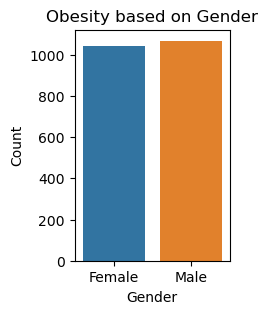

In [7]:
plt.figure(figsize=(2,3))
sns.countplot('Gender',data=df)
plt.title('Obesity based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Male is slightly high in obesity compared to Female.

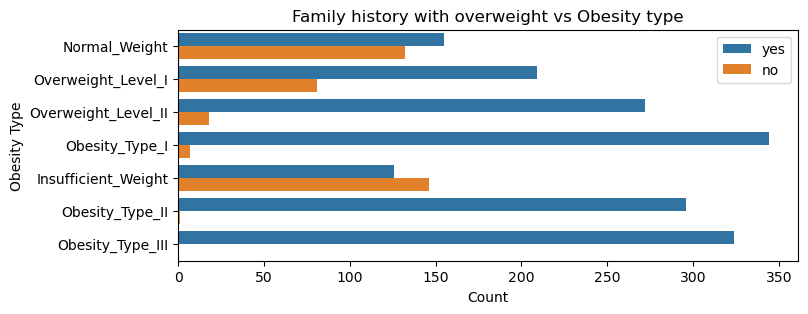

In [8]:
plt.figure(figsize=(8,3))
sns.countplot(data=df,y='NObeyesdad',hue='family_history_with_overweight')
plt.ylabel('Obesity Type')
plt.xlabel('Count')
plt.title('Family history with overweight vs Obesity type')
plt.legend()
plt.show()

People with Family history with Obesity as yes are having Obesity in all the Obesity_Type.

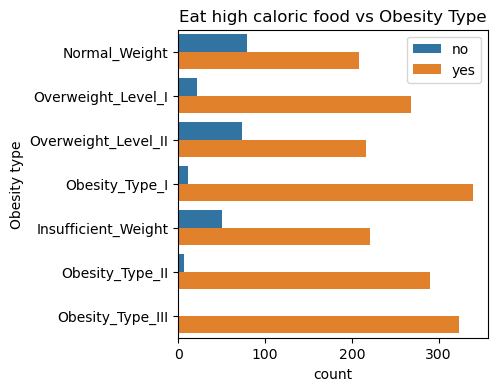

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,y='NObeyesdad',hue='FAVC')
plt.title('Eat high caloric food vs Obesity Type')
plt.ylabel('Obesity type')
plt.legend()
plt.show()

People eating high caloric food has Obesity in most cases.

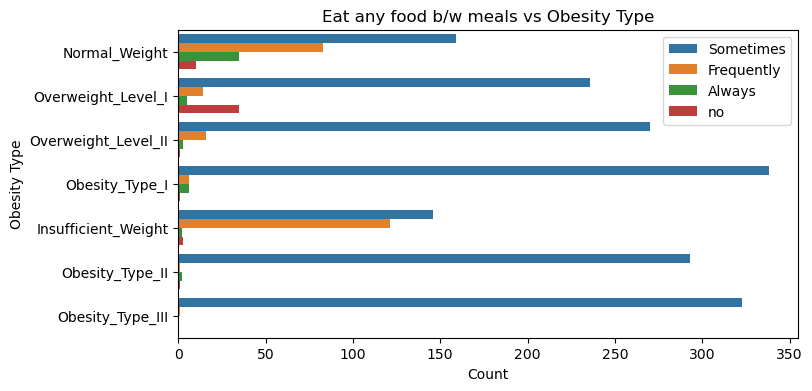

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,y='NObeyesdad',hue='CAEC')
plt.title('Eat any food b/w meals vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Count')
plt.legend()
plt.show()

People who eat any food sometimes in between meals are high in acquiring Obesity.

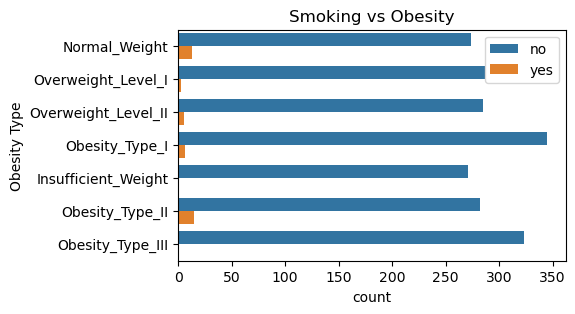

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,y='NObeyesdad',hue='SMOKE')
plt.title('Smoking vs Obesity')
plt.ylabel('Obesity Type')
plt.legend()
plt.show()

People not smoking are having Obesity too in high rates.

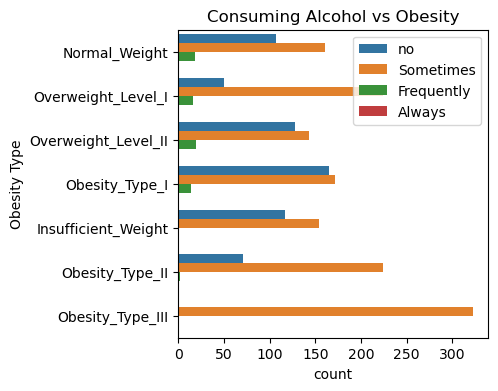

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,y='NObeyesdad',hue='CALC')
plt.title('Consuming Alcohol vs Obesity')
plt.ylabel('Obesity Type')
plt.legend()
plt.show()

People who consume alcohol sometimes are high in Obesity rates.

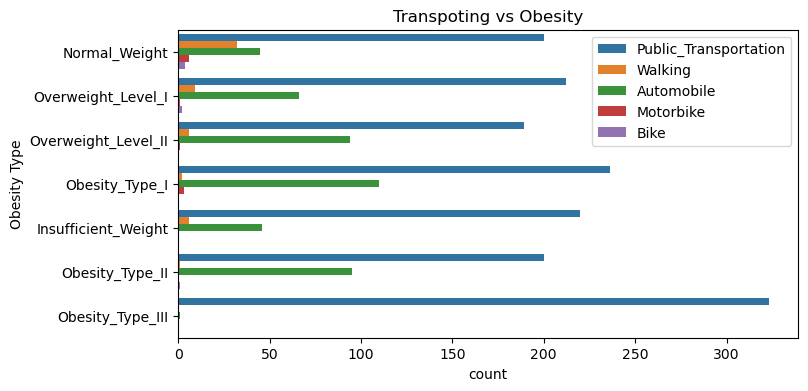

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,y='NObeyesdad',hue='MTRANS')
plt.title('Transpoting vs Obesity')
plt.ylabel('Obesity Type')
plt.legend()
plt.show()

People who are transporting through public transportation are high in Obesity rates 
and who are using automobile are second high in obesity rates.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


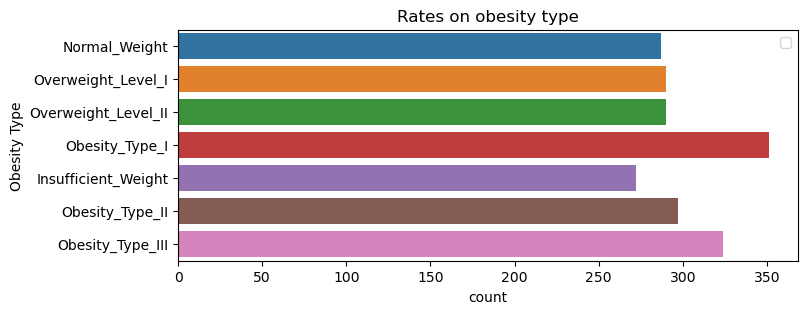

In [14]:
plt.figure(figsize=(8,3))
sns.countplot(data=df,y='NObeyesdad')
plt.title('Rates on obesity type')
plt.ylabel('Obesity Type')
plt.legend()
plt.show()

Obesity Type I are high among people.

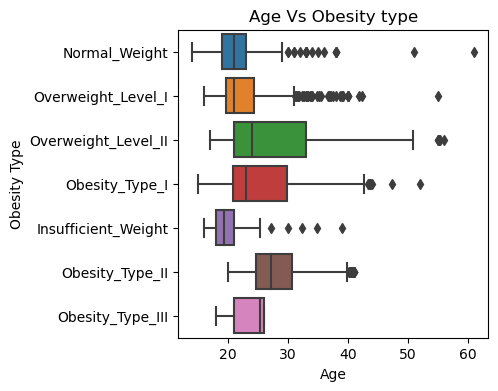

In [15]:
#df.boxplot(column='Age', by='NObeyesdad', vert=0,figsize=(8,5))
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='Age', y='NObeyesdad')
plt.title('Age Vs Obesity type')
plt.ylabel('Obesity Type')
plt.show()

Obesity is seen most probably between ages 15 to 35 years.

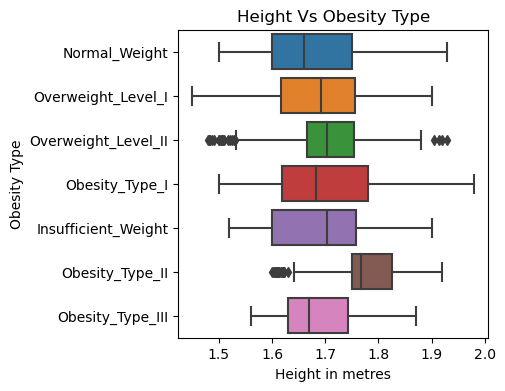

In [16]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='Height',y='NObeyesdad')
plt.title('Height Vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Height in metres')
plt.show()

Obesity can be seen mostly in person of height between 1.6 to 1.85 metres. 

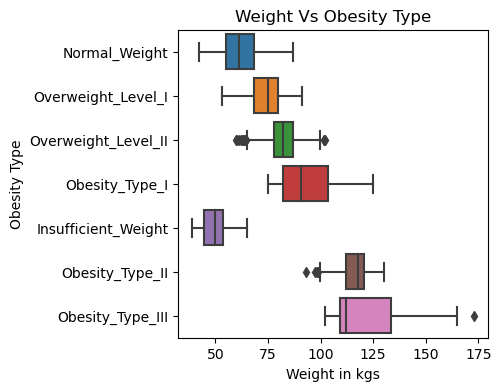

In [17]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='Weight',y='NObeyesdad')
plt.title('Weight Vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Weight in kgs')
plt.show()

Obesity Type I can be seen most probably between 80 to 100kgs and Obesity Type II can be seen most probably between 115 to 120 Kgs and Obesity Type III can be seen most probably between 110 to 130 Kgs.

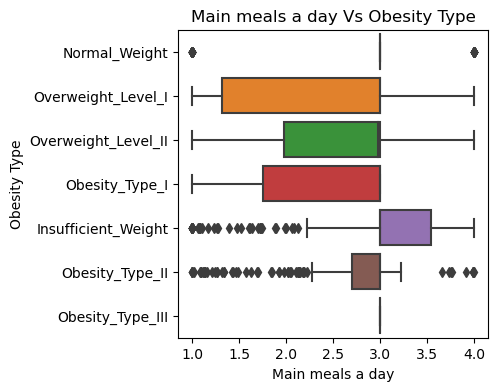

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='NCP',y='NObeyesdad')
plt.title('Main meals a day Vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Main meals a day')
plt.show()

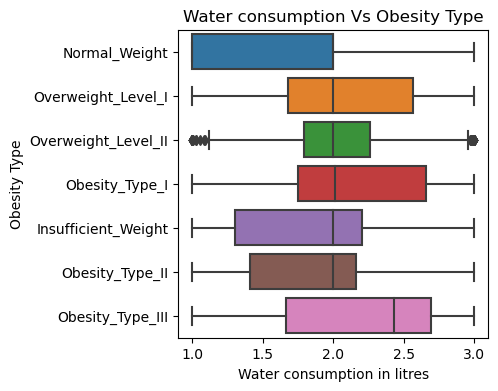

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='CH2O',y='NObeyesdad')
plt.title('Water consumption Vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Water consumption in litres')
plt.show()

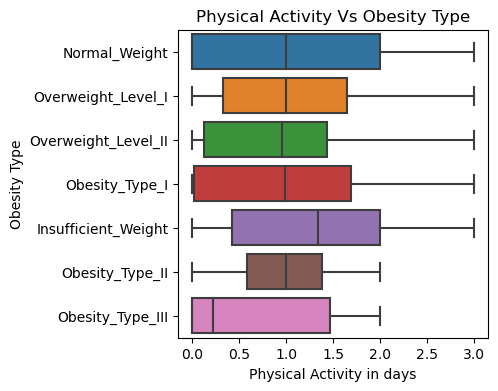

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='FAF',y='NObeyesdad')
plt.title('Physical Activity Vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Physical Activity in days')
plt.show()

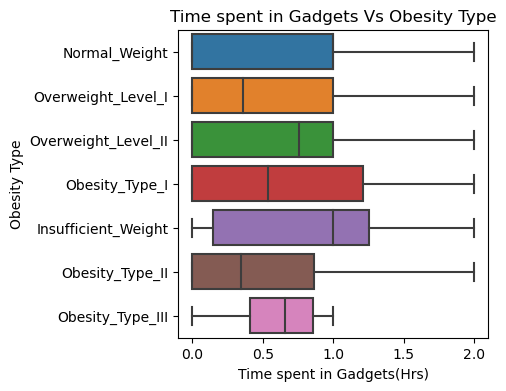

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='TUE',y='NObeyesdad')
plt.title('Time spent in Gadgets Vs Obesity Type')
plt.ylabel('Obesity Type')
plt.xlabel('Time spent in Gadgets(Hrs)')
plt.show()

# Outlier Removal:

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


There is no massive variation between the min and max of the data, therefore no massive outliers to be treated.

# Analysis and Preprocessing:

In [9]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [11]:
df1=df.drop(['SCC'],axis='columns')
len(df1.columns)

16

In [12]:
df1.Gender.value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [13]:
df1.family_history_with_overweight.value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [14]:
df1.FAVC.value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [15]:
df1.SMOKE.value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

## Onehot encoding:

In [16]:
df2=pd.get_dummies(df1,columns=['Gender','family_history_with_overweight','SMOKE','FAVC'],drop_first=True)
df2

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,FAVC_yes
0,21.000000,1.620000,64.000000,2.0,3.0,Sometimes,2.000000,0.000000,1.000000,no,Public_Transportation,Normal_Weight,0,1,0,0
1,21.000000,1.520000,56.000000,3.0,3.0,Sometimes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,1,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,Sometimes,2.000000,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,1,1,0,0
3,27.000000,1.800000,87.000000,3.0,3.0,Sometimes,2.000000,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1,0,0,0
4,22.000000,1.780000,89.800000,2.0,1.0,Sometimes,2.000000,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,Sometimes,1.728139,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,0,1,0,1
2107,21.982942,1.748584,133.742943,3.0,3.0,Sometimes,2.005130,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,0,1,0,1
2108,22.524036,1.752206,133.689352,3.0,3.0,Sometimes,2.054193,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,0,1,0,1
2109,24.361936,1.739450,133.346641,3.0,3.0,Sometimes,2.852339,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,0,1,0,1


In [17]:
len(df2.columns)

16

In [18]:
df.CAEC.value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [19]:
df['CAEC']

0       Sometimes
1       Sometimes
2       Sometimes
3       Sometimes
4       Sometimes
          ...    
2106    Sometimes
2107    Sometimes
2108    Sometimes
2109    Sometimes
2110    Sometimes
Name: CAEC, Length: 2111, dtype: object

In [20]:
dict_CAEC={'no':0,'Sometimes':1,'Frequently':2,'Always':3}
df3=df2.replace({'CAEC':dict_CAEC})
df3.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,no,Public_Transportation,Normal_Weight,0,1,0,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,1,0,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,0,0,0
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0


In [21]:
df.CALC.value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [22]:
dict_CALC={'no':0,'Sometimes':1,'Frequently':2,'Always':3}
df3=df3.replace({'CALC':dict_CALC})
df3.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,0,Public_Transportation,Normal_Weight,0,1,0,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,1,Public_Transportation,Normal_Weight,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,2,Public_Transportation,Normal_Weight,1,1,0,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,2,Walking,Overweight_Level_I,1,0,0,0
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,1,0,0,0


In [23]:
df3['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [24]:
le_object= LabelEncoder()
df3['MTRANS']=le_object.fit_transform(df['MTRANS'])
df3.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,0,3,Normal_Weight,0,1,0,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,1,3,Normal_Weight,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,2,3,Normal_Weight,1,1,0,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,2,4,Overweight_Level_I,1,0,0,0
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,1,3,Overweight_Level_II,1,0,0,0


In [25]:
le_object1=LabelEncoder()
df3['NObeyesdad']=le_object1.fit_transform(df3['NObeyesdad'])
df3.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,0,3,1,0,1,0,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,1,3,1,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,2,3,1,1,1,0,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,2,4,5,1,0,0,0
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,1,3,6,1,0,0,0


In [26]:
df3.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CAEC                                    int64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
CALC                                    int64
MTRANS                                  int32
NObeyesdad                              int32
Gender_Male                             uint8
family_history_with_overweight_yes      uint8
SMOKE_yes                               uint8
FAVC_yes                                uint8
dtype: object

# Feature Scaling:

In [27]:
scale_vars=['Age','Height','Weight','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df3[scale_vars]=scaler.fit_transform(df3[scale_vars])
df3.head()



,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,FAVC_yes
0,0.148936,0.320755,0.186567,0.5,0.666667,0.333333,0.5,0.000000,0.5,0.000000,0.75,1,0,1,0,0
1,0.148936,0.132075,0.126866,1.0,0.666667,0.333333,1.0,1.000000,0.0,0.333333,0.75,1,0,1,1,0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.333333,0.5,0.666667,0.5,0.666667,0.75,1,1,1,0,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.333333,0.5,0.666667,0.0,0.666667,1.00,5,1,0,0,0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.333333,0.5,0.000000,0.0,0.333333,0.75,6,1,0,0,0


# Splitting into X and y:

In [28]:
X=df3.drop('NObeyesdad',axis='columns')
y=df3['NObeyesdad']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [30]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1477
1477
634
634


# Modelling:

# Decision Tree Classifier:

In [35]:
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(criterion='entropy')
Dtree.fit(X_train,y_train)
y_pred=Dtree.predict(X_test)

In [36]:
Dtree.score(X_test,y_test)

0.9542586750788643

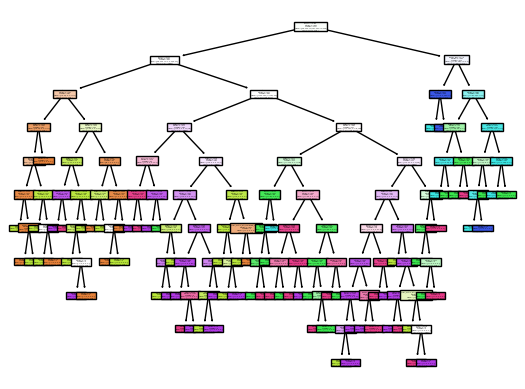

In [39]:
from sklearn import tree
dtree=tree.plot_tree(Dtree,feature_names=X.columns,class_names=['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight'],filled=True)
plt.savefig('Obesity.png',format='png',dpi=400)

# Random Forest Classifier:

In [196]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy')
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [197]:
rfc.score(X_test,y_test)

0.9353312302839116

# Support Vector Classifier:

In [198]:
from sklearn.svm import SVC
svc=SVC(C=15,kernel='poly',gamma='scale',degree=2)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [199]:
svc.score(X_test,y_test)

0.9479495268138801

# Naive Bayes:

In [150]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=0.1)
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [151]:
nb.score(X_test,y_test)

0.4148264984227129

# KNN Classifier:

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [209]:
knn.score(X_test,y_test)

0.7807570977917981

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def find_best_model(X,y):
    estimator={
        'DT':{'model':DecisionTreeClassifier(),
          'params':{'criterion':['gini','entropy']}},
        'RF':{'model':RandomForestClassifier(),
             'params':{'criterion':['gini','entropy']}},
        'SVC':{'model':SVC(),
           'params':{'kernel':['poly','rbf','sigmoid']}},
        'NB':{'model':MultinomialNB(),
          'params':{'alpha':[0.5,1.0,1.5,2.0,5.0]}},
        'KNN':{'model':KNeighborsClassifier(),
           'params':{'n_neighbors':[3,5,7,9,11,15]}}
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for estimator_name,config in estimator.items():
        gridcv=GridSearchCV(config['model'],config['params'],cv=cv)
        gridcv.fit(X,y)
        scores.append({
        'model':estimator_name,
        'best_score':gridcv.best_score_,
        'best_params':gridcv.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
 
find_best_model(X,y)

,model,best_score,best_params
0,DT,0.950355,{'criterion': 'entropy'}
1,RF,0.952719,{'criterion': 'entropy'}
2,SVC,0.932388,{'kernel': 'poly'}
3,NB,0.417494,{'alpha': 0.5}
4,KNN,0.785816,{'n_neighbors': 3}


# Conclusion:

Random Forest Classifier performs well in classifying the Obesity Type with accuracy of 95%